<a href="https://colab.research.google.com/github/LakshyMehta/CET/blob/main/Live_CCTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/LakshyMehta/CET


Cloning into 'CET'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%cd /content/CET


/content/CET


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
train = "/content/drive/MyDrive/Human_Dataset/train/_annotations.csv"
train_df = pd.read_csv(train)




In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Human_Dataset/train/_annotations.csv")

df['filepath'] = df['filename'].apply(lambda x: os.path.join('/content/drive/MyDrive/Human_Dataset/train', x))
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df['filepath'].values
y_train = train_df[['xmin','ymin','xmax','ymax']].values
X_test = test_df['filepath'].values
y_test = test_df[['xmin','ymin','xmax','ymax']].values


In [ ]:
X_train[2]

'/content/drive/MyDrive/Human_Dataset/train/000000022208_jpg.rf.c60a8460e2acb514c084c4612ee5f7d1.jpg'

In [ ]:
os.path.exists('/content/drive/MyDrive/Human_Dataset/train/000000365724_jpg.rf.2194461a624e16b0da278cb9805de749.jpg')

True

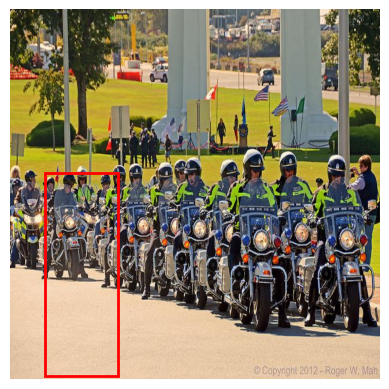

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


img = mpimg.imread(X_train[640])

bbox = y_train[640]

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')

rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                         linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def preprocess_images(image_paths, target_size=(64, 64)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=target_s
                       ize)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=0.2)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 4), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=string)
  • training=True
  • mask=None